In [1]:
import pandas as pd
import json

path_to_files = "/share/D3/data/hweiner/Model_Test_Data/out_data"

# Note this is an old way to load in data, things may change requiring several changes to the plotting code
with open(f"{path_to_files}/RAMS_AnalysisVariables_tobac.json", "r") as file:
    rams_analysis_data = json.load(file)
with open(f"{path_to_files}/WRF_AnalysisVariables_tobac.json", "r") as file:
    wrf_analysis_data = json.load(file)
with open(f"{path_to_files}//MESONH_AnalysisVariables_tobac.json", "r") as file:
    mesonh_analysis_data = json.load(file)

/tmp/ipykernel_130981/2147850782.py:28: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(np.array(analysis_data[f'{model}_{variable}'])[cells == c])


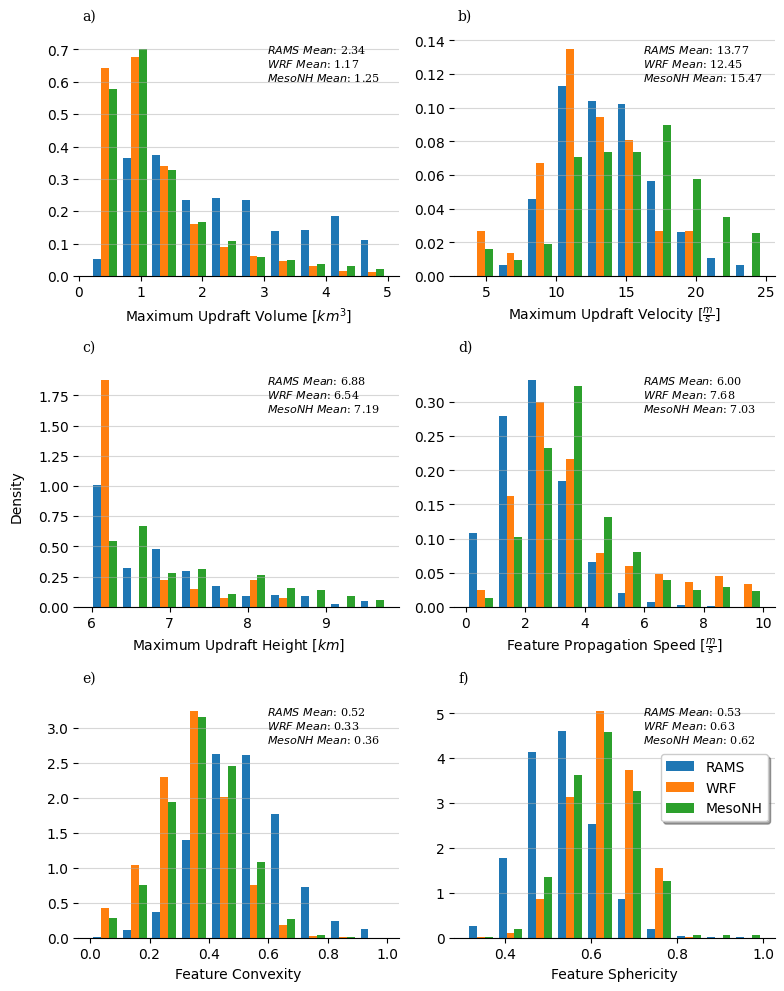

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

# Make copies of the data
rams_analysis_data_copy = deepcopy(rams_analysis_data)
wrf_analysis_data_copy = deepcopy(wrf_analysis_data)
mesonh_analysis_data_copy = deepcopy(mesonh_analysis_data)

plot_variables = ['tobac_volume', 'tobac_max_intensity', 'tobac_var_max_height', 'tobac_speed', 'tobac_convexity', 'tobac_sphericity']
cutoff_variables = [5, 25, 10, 10, np.inf, np.inf]
titles = [r"Maximum Updraft Volume [$km^3$]", r"Maximum Updraft Velocity [$\frac{m}{s}$]", r"Maximum Updraft Height [$km$]", r"Feature Propagation Speed [$\frac{m}{s}$]", "Feature Convexity", "Feature Sphericity"]

# Plot the data
rows = 3
cols = 2
fig,ax = plt.subplots(rows, cols, figsize=[8, 10])
x_font_size = 10
label_size = 10
fig.supylabel('Density', fontsize=10)

def get_max_of_cell(analysis_data, variable, model):
    cells = analysis_data[f'{model}_{variable}_cells']
    plot = []

    for c in np.unique(cells)[1:]:

        max_val = np.nanmax(np.array(analysis_data[f'{model}_{variable}'])[cells == c])
        if not(np.isnan(max_val)):
            plot.append(max_val)

    plot = np.array(plot)

    return plot

mean_values = np.zeros((rows * cols, 3))

for i in range(rows * cols):
    col = i % cols
    row = np.floor(i / cols).astype(int)

    cutoff = cutoff_variables[i]
    variable = plot_variables[i]
    title = titles[i]

    # Get the cell information and take the max within the cell, not feature
    if variable in ["tobac_volume", "tobac_max_intensity", "tobac_var_max_height"]:
        rams_plot = get_max_of_cell(rams_analysis_data_copy, variable, "rams")
        wrf_plot = get_max_of_cell(wrf_analysis_data_copy, variable, "wrf")
        mesonh_plot = get_max_of_cell(mesonh_analysis_data_copy, variable, "mesonh")

        rams_plot = rams_plot[np.logical_and(rams_plot <= cutoff, rams_plot > 0)]
        wrf_plot = wrf_plot[np.logical_and(wrf_plot <= cutoff, wrf_plot > 0)]
        mesonh_plot = mesonh_plot[np.logical_and(mesonh_plot <= cutoff, mesonh_plot > 0)]

    else:
        rams_plot = np.array(rams_analysis_data_copy[f'rams_{variable}'])
        wrf_plot = np.array(wrf_analysis_data_copy[f'wrf_{variable}'])
        mesonh_plot = np.array(mesonh_analysis_data_copy[f'mesonh_{variable}'])

    # Mean calculations
    mean_values[i, 0] = np.nanmean(rams_plot[np.isfinite(rams_plot)])
    mean_values[i, 1] = np.nanmean(wrf_plot[np.isfinite(wrf_plot)])
    mean_values[i, 2] = np.nanmean(mesonh_plot[np.isfinite(mesonh_plot)])


    # Plotting cutoffs
    rams_plot = rams_plot[rams_plot <= cutoff]
    wrf_plot = wrf_plot[wrf_plot <= cutoff]
    mesonh_plot = mesonh_plot[mesonh_plot <= cutoff]

    ax[row, col].hist([rams_plot, wrf_plot, mesonh_plot], density=True, label=["RAMS", "WRF", "MesoNH"])
    ax[row, col].set_xlabel(title, fontsize=x_font_size)
    ax[row, col].tick_params(axis='both', labelsize = label_size)


# PLOT CELL GROWTH AND DISSIPATION
# growth_dissip_cutoff = 0.025
# rams_total_growth_info = np.array(rams_analysis_data_copy['rams_tobac_cell_growth'])
# rams_growth = rams_total_growth_info[rams_total_growth_info > 0] / 5 # correct for the cell growth calculation mishap
# rams_growth = rams_growth[np.isfinite(rams_growth)]
# rams_growth_plot = rams_growth[rams_growth <= growth_dissip_cutoff]
# rams_dissipate = rams_total_growth_info[rams_total_growth_info < 0] / 5 # correct for the cell growth calculation mishap
# rams_dissipate = -rams_dissipate[np.isfinite(rams_dissipate)]
# rams_dissipate_plot = rams_dissipate[rams_dissipate <= growth_dissip_cutoff]

# wrf_total_growth_info = np.array(wrf_analysis_data_copy['wrf_tobac_cell_growth'])
# wrf_growth = wrf_total_growth_info[wrf_total_growth_info > 0]
# wrf_growth = wrf_growth[np.isfinite(wrf_growth)]
# wrf_growth_plot = wrf_growth[wrf_growth <= growth_dissip_cutoff]
# wrf_dissipate = wrf_total_growth_info[wrf_total_growth_info < 0]
# wrf_dissipate = -wrf_dissipate[np.isfinite(wrf_dissipate)]
# wrf_dissipate_plot = wrf_dissipate[wrf_dissipate <= growth_dissip_cutoff]

# mesonh_total_growth_info = np.array(mesonh_analysis_data_copy['mesonh_tobac_cell_growth'])
# mesonh_growth = mesonh_total_growth_info[mesonh_total_growth_info > 0]
# mesonh_growth = mesonh_growth[np.isfinite(mesonh_growth)]
# mesonh_growth_plot = mesonh_growth[mesonh_growth <= growth_dissip_cutoff]
# mesonh_dissipate = mesonh_total_growth_info[mesonh_total_growth_info < 0]
# mesonh_dissipate = -mesonh_dissipate[np.isfinite(mesonh_dissipate)]
# mesonh_dissipate_plot = mesonh_dissipate[mesonh_dissipate <= growth_dissip_cutoff]

# ax[3, 0].hist([rams_growth_plot, wrf_growth_plot, mesonh_growth_plot], density=True, label=["RAMS", "WRF","MesoNH"])
# ax[3, 0].set_xlabel(r"Feature Growth Rate [$\frac{km^3}{s}$]", fontsize=x_font_size)
# ax[3, 0].set_xticklabels(np.round(ax[3, 0].get_xticks(), 3), rotation=30)
# ax[3, 0].tick_params(axis='both', labelsize = label_size)

# ax[3, 1].hist([rams_dissipate_plot, wrf_dissipate_plot, mesonh_dissipate_plot], density=True, label=["RAMS", "WRF","MesoNH"])
# ax[3, 1].set_xlabel(r"Feature Dissipation Rate [$\frac{km^3}{s}$]", fontsize=x_font_size)
# ax[3, 1].set_xticklabels(np.round(ax[3, 1].get_xticks(), 3), rotation=30)
# ax[3, 1].tick_params(axis='both', labelsize = label_size)

# mean_values[-2, :] = [np.nanmean(rams_growth), np.nanmean(wrf_growth), np.nanmean(mesonh_growth)]
# mean_values[-1, :] = [np.nanmean(rams_dissipate), np.nanmean(wrf_dissipate), np.nanmean(mesonh_dissipate)]

# Plot settings
the_alphabet = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)']#, 'g)', 'h)']
axes_to_iterate = np.array(ax).reshape(-1)

# add the sublabels, mean statistics
for ind, let, axis in zip(range(len(the_alphabet)), the_alphabet, axes_to_iterate):

    mean_value_string = r"$\it{RAMS \ Mean}$: " + f"{mean_values[ind, 0]:.2f}\n" + r"$\it{WRF \ Mean}$: " + f"{mean_values[ind, 1]:.2f}\n" + r"$\it{MesoNH \ Mean}$: " + f"{mean_values[ind, 2]:.2f}\n"

    letter_xy = (-0.01, 1.15)

    axis.annotate(
        let,
        xy=letter_xy, xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize= 10, verticalalignment='top', fontfamily='serif',
        )

    xy = (0.57, 1)

    axis.annotate(
        mean_value_string,
        xy=xy, xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize= 8, verticalalignment='top', fontfamily='serif',    )

    axis.grid(axis='y', alpha=0.5)
    axis.spines[['right', 'top', 'left']].set_visible(False)
    
ax[2, 1].legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize=10)

plt.tight_layout()
# plt.savefig("/D3/data/hweiner/model_histogram.png", dpi=600)
plt.show()